# Charge Time Machine Learning Algorithm Generation

## Splitting the data

In [1]:
import pandas as pd
import datetime as td
import  numpy as np
import datetime 
import datetime as dt
df = pd.read_csv('data/chargeML.csv')
df=df._convert(numeric=True)
df=df.dropna()
#df['date2'] =  pd.to_datetime(df['date2'])
#df.index.to_pydatetime() 
#df=df.date2.to_pydatetime() 
df['date2']=pd.to_datetime(df.date2)
#df['date2'] =  pd.to_datetime(df['date2'])
df["dayInMonth"] =df['date2'].dt.day
inData=dataSet=df

In [2]:
## Need to add a cos function for day of week
import math as ma
df["cos_week"] = np.cos(df["dayOfWeek"]/7*2*ma.pi)
df["sin_hour"]=np.sin(df["dayOfWeek"]/7*2*ma.pi)

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

splitOption = 1 # split per day of the month

#cutOffTestDate=2022.01.01
cutOffTestDate = datetime.datetime(2022, 1, 1)
testSet = dataSet.loc[(inData.date2 > cutOffTestDate), :]
mainSet = dataSet.loc[(inData.date2 <= cutOffTestDate), :]


In [4]:
trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date2 <= cutOffTestDate), :]

### Doing "Data Windowing"

In [5]:
'''def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window'''

"def split_window(self, features):\n  inputs = features[:, self.input_slice, :]\n  labels = features[:, self.labels_slice, :]\n  if self.label_columns is not None:\n    labels = tf.stack(\n        [labels[:, :, self.column_indices[name]] for name in self.label_columns],\n        axis=-1)\n\n  # Slicing doesn't preserve static shape information, so set the shapes\n  # manually. This way the `tf.data.Datasets` are easier to inspect.\n  inputs.set_shape([None, self.input_width, None])\n  labels.set_shape([None, self.label_width, None])\n\n  return inputs, labels\n\nWindowGenerator.split_window = split_window"

In [6]:
# Above isn't used, I don't think it needs to be

### Normalising the data

In [7]:
trainDate=trainSet.date2
validDate=validSet.date2
testDate=testSet.date2

In [8]:
trainSet=trainSet.drop('date2',1)
validSet=validSet.drop('date2',1)
testSet=testSet.drop('date2',1)
trainSet=trainSet.drop('dayInMonth',1)
validSet=validSet.drop('dayInMonth',1)
testSet=testSet.drop('dayInMonth',1)
trainSet=trainSet.drop('dayOfWeek',1)
validSet=validSet.drop('dayOfWeek',1)
testSet=testSet.drop('dayOfWeek',1)
trainSet=trainSet.drop('dayOfYear',1)
validSet=validSet.drop('dayOfYear',1)
testSet=testSet.drop('dayOfYear',1)
trainSet=trainSet.drop('hour',1)
validSet=validSet.drop('hour',1)
testSet=testSet.drop('hour',1)

/tmp/ipykernel_76878/1176180537.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('date2',1)
/tmp/ipykernel_76878/1176180537.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validSet=validSet.drop('date2',1)
/tmp/ipykernel_76878/1176180537.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testSet=testSet.drop('date2',1)
/tmp/ipykernel_76878/1176180537.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('dayInMonth',1)
/tmp/ipykernel_76878/1176180537.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  v

In [9]:
train_mean = trainSet.mean()
train_std = trainSet.std()

In [10]:
train_df = (trainSet - train_mean) / train_std
val_df = (validSet - train_mean) / train_std
test_df = (testSet - train_mean) / train_std

In [11]:
train_mean['ActualGenerationMW']
train_std['ActualGenerationMW']

887.6834808327612

In [12]:
#re-creating date-column
train_df['date2']=trainDate
val_df['date2']=validDate
test_df['date2']=testDate

# Re-adding removed columns
train_df['hour']=train_df['date2'].dt.hour
train_df['dayOfWeek']=train_df['date2'].dt.day_of_week
train_df['dayOfYear']=train_df['date2'].dt.day_of_year
train_df["dayInMonth"] =train_df['date2'].dt.day
# Re-adding removed columns
val_df['hour']=val_df['date2'].dt.hour
val_df['dayOfWeek']=val_df['date2'].dt.day_of_week
val_df['dayOfYear']=val_df['date2'].dt.day_of_year
val_df["dayInMonth"] =val_df['date2'].dt.day
# Re-adding removed columns
test_df['hour']=test_df['date2'].dt.hour
test_df['dayOfWeek']=test_df['date2'].dt.day_of_week
test_df['dayOfYear']=test_df['date2'].dt.day_of_year
test_df["dayInMonth"] =test_df['date2'].dt.day

#Resetting the Actual Generation to be non-continuous
train_df['ActualGenerationMW']=train_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
val_df['ActualGenerationMW']=val_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
test_df['ActualGenerationMW']=test_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
# Re-setting the names of the columns
trainSet=train_df
validSet=val_df
testSet=test_df

In [13]:
'''
if (splitOption == 0):  # Standard SkLearn train test split, usually not good for time series

elif (splitOption == 1):  # split before / after day of the month
  dataSet["dayInMonth"] = 0

  def setDayInMonth(row):
      row["dayInMonth"] = row.date.day
      return row

  dataSet = dataSet.apply(setDayInMonth, axis=1)

  trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
  validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date <= cutOffTestDate), :]
elif (splitOption == 2):  # split per period
  trainSet = dataSet.loc[(inData.date <= cutOffValidationDate), :]
  validSet = dataSet.loc[(inData.date > cutOffValidationDate), :]  
  '''

'\nif (splitOption == 0):  # Standard SkLearn train test split, usually not good for time series\n\nelif (splitOption == 1):  # split before / after day of the month\n  dataSet["dayInMonth"] = 0\n\n  def setDayInMonth(row):\n      row["dayInMonth"] = row.date.day\n      return row\n\n  dataSet = dataSet.apply(setDayInMonth, axis=1)\n\n  trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]\n  validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date <= cutOffTestDate), :]\nelif (splitOption == 2):  # split per period\n  trainSet = dataSet.loc[(inData.date <= cutOffValidationDate), :]\n  validSet = dataSet.loc[(inData.date > cutOffValidationDate), :]  \n  '

In [14]:
y_train = trainSet.ActualGenerationMW
y_valid = validSet.ActualGenerationMW
y_test = testSet.ActualGenerationMW	

In [15]:
X_train = trainSet
X_valid = validSet 

## Random forest generation

### Choosing Columns

In [16]:
#Version 1; Causing failures on kernel for ? reason
X_train1 = X_train[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir',]]
X_valid1 = X_valid[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]

In [17]:
#Version 1; Causing failures on kernel for ? reason
X_train1 = X_train[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]
X_valid1 = X_valid[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]

In [18]:
'''print(X_train['ForecastWind'].isnull().values.any())
print(X_train['dayOfWeek'].isnull().values.any())
print(X_train['dub_msl'].isnull().values.any())
print(X_train['hour'].isnull().values.any())
print(X_train['don_wddir'].isnull().values.any())
print(X_train['dub_wddir'].isnull().values.any())'''

"print(X_train['ForecastWind'].isnull().values.any())\nprint(X_train['dayOfWeek'].isnull().values.any())\nprint(X_train['dub_msl'].isnull().values.any())\nprint(X_train['hour'].isnull().values.any())\nprint(X_train['don_wddir'].isnull().values.any())\nprint(X_train['dub_wddir'].isnull().values.any())"

In [19]:
'''#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,y_train)'''

'#Import Random Forest Model\nfrom sklearn.ensemble import RandomForestClassifier\n\n#Create a Gaussian Classifier\nclf=RandomForestClassifier(n_estimators=10)\n\n#Train the model using the training sets y_pred=clf.predict(X_test)\nclf.fit(X_train1,y_train)'

In [20]:
'''
#Import Random Forest "Classifier" Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)
clf=RandomForestClassifier(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)
#clf=RandomForestClassifier(n_estimators=100,random_state = 43)
print(clf.get_params())
#Train the model using the training sets y_pred=clf.predict(X_test)

# Training the model
clf.fit(X_train1,y_train)

#Returning predicted data
y_pred=clf.predict(X_valid1)

#Using test for training data will run into issues

#X_test1 = X_test[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]
#y_testpred=clf.predict(X_test1)


# Plotting last week of data
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))'''

'\n#Import Random Forest "Classifier" Model\nfrom sklearn.ensemble import RandomForestClassifier\n\n#Create a Gaussian Classifier\n#clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)\nclf=RandomForestClassifier(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)\n#clf=RandomForestClassifier(n_estimators=100,random_state = 43)\nprint(clf.get_params())\n#Train the model using the training sets y_pred=clf.predict(X_test)\n\n# Training the model\nclf.fit(X_train1,y_train)\n\n#Returning predicted data\ny_pred=clf.predict(X_valid1)\n\n#Using test for training data will run into issues\n\n#X_test1 = X_test[[\'ForecastWind\',\'dayOfWeek\',\'dub_msl\',\'hour\',\'dub_wddir\']]\n#y_testpred=clf.predict(X_test1)\n\n\n# Plotting last week of data\nimport matplotlib.pyplot as plt \nfrom matplotlib.pyplot import figure\n\nplt.plot(X_valid[\'date2\'][-7*24:],y_pred[-7*24:],color = \'blue\')\nplt.plot(X_valid[\'date2\'][-7*24:],y_valid[-7*2


### Example Baselines 

clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)

Using  [['ForecastWind','sin_day','sin_hour']]
Mean Absolute Error: 574.4672045420589
Mean Squared Error: 532948.2448827133
Root Mean Squared Error: 730.0330436923477



clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)

Using [['ForecastWind','sin_day','sin_hour','dub_wddir','dub_wdsp','dub_msl']]
Mean Absolute Error: 594.1552368145824
Mean Squared Error: 585698.313312416
Root Mean Squared Error: 765.3092925820357


### Reggresion model

In [21]:
from sklearn.ensemble import RandomForestRegressor

#rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)
rrf=RandomForestRegressor(n_estimators=100,random_state = 42)

#clf=RandomForestClassifier(n_estimators=100,random_state = 43)
#print(clf.get_params())
#Train the model using the training sets y_pred=clf.predict(X_test

In [22]:
rrf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [23]:
rrf.fit(X_train1,y_train)

RandomForestRegressor(random_state=42)

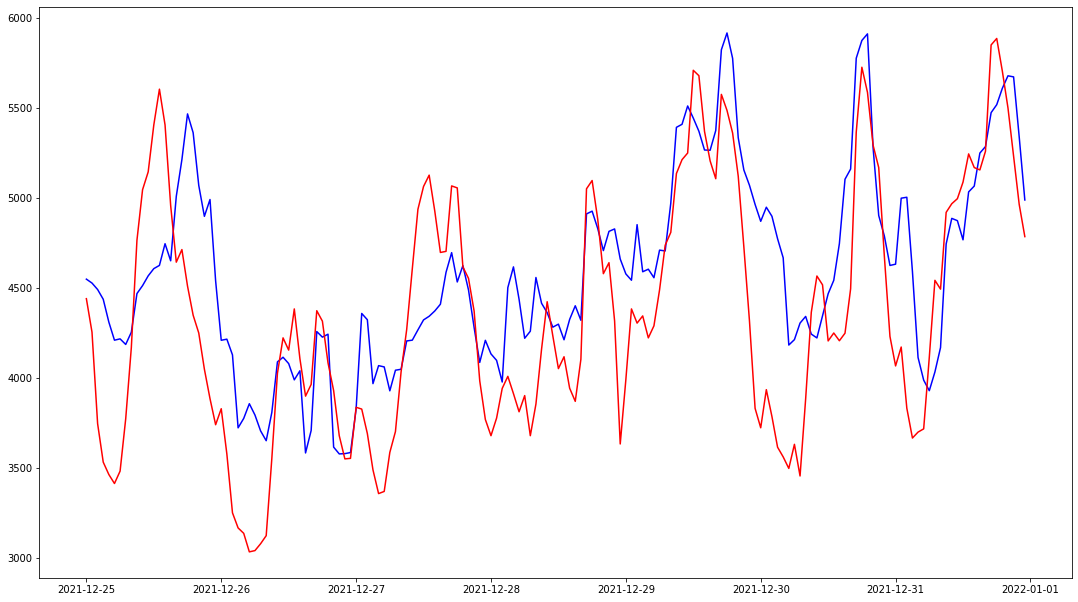

In [24]:
y_pred=rrf.predict(X_valid1)
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [25]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 479.4909188704617
Mean Squared Error: 362932.07708576124
Root Mean Squared Error: 602.438442569663


<BarContainer object of 8 artists>

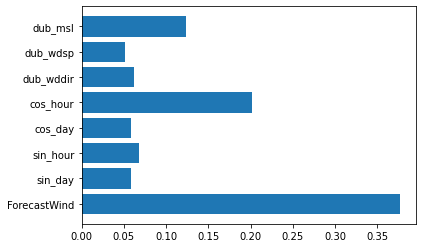

In [26]:
plt.barh(X_valid1.columns, rrf.feature_importances_)

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 465.79800324008335
Mean Squared Error: 332345.30211887945
Root Mean Squared Error: 576.4939740525302

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 479.4909188704617
Mean Squared Error: 362932.07708576124
Root Mean Squared Error: 602.438442569663

## Using Tenserflow

In [27]:
import tensorflow_decision_forests as tfdf


2022-06-28 18:48:24.125197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 18:48:24.125251: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [28]:
trainSetTF=trainSet
validSetTF=validSet
testSetTF=testSet

In [29]:
#Dropping time from the train and test columns
trainSetTF=trainSetTF.drop('date2',1)
validSetTF=validSetTF.drop('date2',1)
testSetTF=testSetTF.drop('date2',1)
trainSetTF=trainSetTF.drop('dayInMonth',1)
validSetTF=validSetTF.drop('dayInMonth',1)
testSetTF=testSetTF.drop('dayInMonth',1)
trainSetTF=trainSetTF.drop('dayOfWeek',1)
validSetTF=validSetTF.drop('dayOfWeek',1)
testSetTF=testSetTF.drop('dayOfWeek',1)
trainSetTF=trainSetTF.drop('dayOfYear',1)
validSetTF=validSetTF.drop('dayOfYear',1)
testSetTF=testSetTF.drop('dayOfYear',1)
trainSetTF=trainSetTF.drop('hour',1)
validSetTF=validSetTF.drop('hour',1)
testSetTF=testSetTF.drop('hour',1)

/tmp/ipykernel_76878/4217556139.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSetTF=trainSetTF.drop('date2',1)
/tmp/ipykernel_76878/4217556139.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validSetTF=validSetTF.drop('date2',1)
/tmp/ipykernel_76878/4217556139.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testSetTF=testSetTF.drop('date2',1)
/tmp/ipykernel_76878/4217556139.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSetTF=trainSetTF.drop('dayInMonth',1)
/tmp/ipykernel_76878/4217556139.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

In [30]:

'''
trainSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(trainSetTF, label=label, task=tfdf.keras.Task.REGRESSION)
testSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(testSetTF, label=label, task=tfdf.keras.Task.REGRESSION)
'''

'\ntrainSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(trainSetTF, label=label, task=tfdf.keras.Task.REGRESSION)\ntestSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(testSetTF, label=label, task=tfdf.keras.Task.REGRESSION)\n'

In [31]:

y_trainTF = trainSetTF.ActualGenerationMW
y_validTF = validSetTF.ActualGenerationMW
y_testTF = testSetTF.ActualGenerationMW

#Version 1; Causing failures on kernel for ? reason
X_trainTF = trainSetTF[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]
X_validTF = validSetTF[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]


In [32]:
# Running into difficulty converting these columns, so I reset the value of X_train to include ActualGenerationMW
label = "ActualGenerationMW"
'''
y_trainTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_trainTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_validTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_validTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_testTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_testTF, label=label, task=tfdf.keras.Task.REGRESSION)
'''

X_trainTF = tfdf.keras.pd_dataframe_to_tf_dataset(X_trainTF, label=label, task=tfdf.keras.Task.REGRESSION)

X_validTF = tfdf.keras.pd_dataframe_to_tf_dataset(X_validTF, label=label, task=tfdf.keras.Task.REGRESSION)

/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
2022-06-28 18:48:27.095167: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 18:48:27.095235: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 18:48:27.095276: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x20217366): /proc/driver/nvidia/version does not exist
/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except

In [33]:
#Using keras
model_7 = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Train the model.
model_7.fit(x=X_trainTF)

Use /tmp/tmpdca28_rk as temporary training directory
Reading training dataset...
Training dataset read in 0:00:09.315185. Found 18975 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpdca28_rk/model/ with prefix 09dd509a20404297
[INFO abstract_model.cc:1246] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:00:16.957158
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [34]:
# Not sure what test_ds should be
'''
import math
# Evaluate the model on the test dataset.
model_7.compile(metrics=["mse"])
evaluation = model_7.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")'''

'\nimport math\n# Evaluate the model on the test dataset.\nmodel_7.compile(metrics=["mse"])\nevaluation = model_7.evaluate(test_ds, return_dict=True)\n\nprint(evaluation)\nprint()\nprint(f"MSE: {evaluation[\'mse\']}")\nprint(f"RMSE: {math.sqrt(evaluation[\'mse\'])}")'

In [36]:
# Not sure why, but this is
'''y_pred=model_7.predict(X_valid1)
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)'''

ValueError: in user code:

    File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 725, in run_step  *
        outputs = model.predict_step(data)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step  **
        return self(x, training=False)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file70vf1u6h.py", line 75, in tf__call
        ag__.if_stmt((ag__.ld(self)._semantics is None), if_body_2, else_body_2, get_state_2, set_state_2, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_file70vf1u6h.py", line 33, in else_body_2
        normalized_inputs = ag__.converted_call(ag__.ld(self)._build_normalized_inputs, (ag__.ld(inputs),), None, fscope)
    File "/tmp/__autograph_generated_file1039bkww.py", line 88, in tf___build_normalized_inputs
        ag__.if_stmt(ag__.converted_call(ag__.ld(isinstance), (ag__.ld(inputs), ag__.ld(dict)), None, fscope), if_body_4, else_body_4, get_state_4, set_state_4, ('inputs',), 1)
    File "/tmp/__autograph_generated_file1039bkww.py", line 87, in else_body_4
        ag__.if_stmt(ag__.converted_call(ag__.ld(isinstance), (ag__.ld(inputs), ag__.ld(tf).Tensor), None, fscope), if_body_3, else_body_3, get_state_3, set_state_3, ('inputs',), 1)
    File "/tmp/__autograph_generated_file1039bkww.py", line 66, in if_body_3
        ag__.if_stmt((ag__.converted_call(ag__.ld(len), (ag__.ld(self)._semantics,), None, fscope) != 1), if_body_1, else_body_1, get_state_1, set_state_1, (), 0)
    File "/tmp/__autograph_generated_file1039bkww.py", line 62, in if_body_1
        raise ag__.converted_call(ag__.ld(ValueError), (f'Calling model with input shape different from the input shape provided during training: Feeding a single array {ag__.ld(inputs)} while the model was trained on {ag__.ld(self)._semantics}.',), None, fscope)

    ValueError: Exception encountered when calling layer "random_forest_model" (type RandomForestModel).
    
    in user code:
    
        File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 896, in call  *
            normalized_inputs = self._build_normalized_inputs(inputs)
        File "/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py", line 849, in _build_normalized_inputs  *
            raise ValueError(
    
        ValueError: Calling model with input shape different from the input shape provided during training: Feeding a single array Tensor("inputs:0", shape=(None, 8), dtype=float32) while the model was trained on {'ForecastWind': <Semantic.NUMERICAL: 1>, 'sin_day': <Semantic.NUMERICAL: 1>, 'sin_hour': <Semantic.NUMERICAL: 1>, 'cos_day': <Semantic.NUMERICAL: 1>, 'cos_hour': <Semantic.NUMERICAL: 1>, 'dub_wddir': <Semantic.NUMERICAL: 1>, 'dub_wdsp': <Semantic.NUMERICAL: 1>, 'dub_msl': <Semantic.NUMERICAL: 1>}.
    
    
    Call arguments received by layer "random_forest_model" (type RandomForestModel):
      • inputs=tf.Tensor(shape=(None, 8), dtype=float32)
      • training=False


In [ ]:
### Another TF model

using_col_list = ['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']
using_col_list.remove('ActualGenerationMW')
feature_list = []
for col in using_col_list:
    feature_list.append(tfdf.keras.FeatureUsage(name=col,semantic=tfdf.keras.FeatureSemantic.NUMERICAL))


model8 = tfdf.keras.RandomForestModel(features = feature_list, task = tfdf.keras.Task.REGRESSION,
    exclude_non_specified_features=True,
    num_trees=1000, max_depth=16,
    split_axis="SPARSE_OBLIQUE",categorical_algorithm="RANDOM",
    missing_value_policy='RANDOM_LOCAL_IMPUTATION',
    sparse_oblique_normalization='STANDARD_DEVIATION',
    compute_oob_variable_importances=True,
    winner_take_all=False)
                                                

#model8.compile(metrics=["Accuracy"])


In [ ]:
!pip install wurlitzer -q

In [ ]:
from wurlitzer import sys_pipes
with sys_pipes():
    model8.fit(X_trainTF)

In [ ]:
# Not sure what test_ds should be
'''
# Evaluate the model on the test dataset.
model8.compile(metrics=["mse"])
evaluation = model8.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")
#print(f"MAE: {evaluation['mae']}")
'''

Not sure if I'll get much better then above

## Convolutional Neural Network


In [ ]:
import tensorflow as tf

In [ ]:
# I think this could be important,
# If convulutional width is set to 3, then given 3 hours of inputs it predicts 1 hour into the future
# We want for 
CONV_WIDTH = 3

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['ActualGenerationMW'])

conv_window

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

## Artificial Neural Networks

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential([            
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_1"),
          tf.keras.layers.Dropout(0.1), #drop-out layer to avoid overfit
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_2"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_3"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=10, activation='relu', name="Layer_4"),
          tf.keras.layers.Dense(units=1, name="output_layer")
          ])

ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

In [ ]:
#copying stuff from document...
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

In [ ]:
ann.fit(X_train1,y_train, batch_size=200, epochs=200)

In [ ]:
y_pred=ann.predict(X_valid1)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

For lr=0.002 and  batch_size=200, epochs=100)

Mean Absolute Error: 470.42779251935326
Mean Squared Error: 353878.8971401352
Root Mean Squared Error: 594.877211817813

For lr=0.0002 and  batch_size=200, epochs=100)
Mean Absolute Error: 478.03476671201486
Mean Squared Error: 364369.589799041
Root Mean Squared Error: 603.6303420132565

For lr=0.0002 and  batch_size=200, epochs=150)
Mean Absolute Error: 470.0360041216103
Mean Squared Error: 354797.59158343874
Root Mean Squared Error: 595.648882802141

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:])
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [ ]:
plt.barh(X_valid1.columns, ann.feature_importances_)

## Muliple hour input Forecasting

Below from https://www.tensorflow.org/tutorials/structured_data/time_series

In [ ]:
train_df3 = train_df[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]
val_df3 = val_df[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]
test_df3 = test_df[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]


In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.val_df3 = val_df3
    self.test_df3 = test_df3

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='ActualGenerationMW', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['ActualGenerationMW'])

conv_window

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['ActualGenerationMW'])
w2

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df3)

@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:


# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df3[:w2.total_window_size]),
                           np.array(train_df3[100:100+w2.total_window_size]),
                           np.array(train_df3[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['ActualGenerationMW'])

conv_window

In [ ]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

### Actually activating the models

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])